# Understanding One-Sample and Two-Sample t-tests with Example Data & Visualizations

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [18]:
# Group A - exam scores
group_A = np.array([85, 90, 78, 88, 92])
# Group B - another group exam scores
group_B = np.array([75, 70, 80, 68, 74])


In [19]:
# One-Sample t-test

In [20]:
t_stat, p_val = stats.ttest_1samp(group_A, 80)

print("One-Sample t-test:")
print("t-statistic =", t_stat)
print("p-value =", p_val)


One-Sample t-test:
t-statistic = 2.703465337712831
p-value = 0.05390053636444806


 Observation -:
            The p_value is greater than 0.05 therefore no significant difference from 80

In [21]:
# One-sample t-test
t_stat2, p_val2 = stats.ttest_ind(group_A, group_B)

print("\nTwo-Sample Independent t-test:")
print("t-statistic =", t_stat2)
print("p-value =", p_val2)



Two-Sample Independent t-test:
t-statistic = 4.108980522006952
p-value = 0.0033954068765167903


In [22]:
# Two-sample independent t-test
t_stat2, p_val2 = stats.ttest_ind(group_A, group_B)

print("\nTwo-Sample Independent t-test:")
print("t-statistic =", t_stat2)
print("p-value =", p_val2)



Two-Sample Independent t-test:
t-statistic = 4.108980522006952
p-value = 0.0033954068765167903


Observation -:
                The p-value is smaller than 0.05 therefore Group A and Group B are significantly different.

In [23]:
# Plot 1: Histogram for One-Sample Test

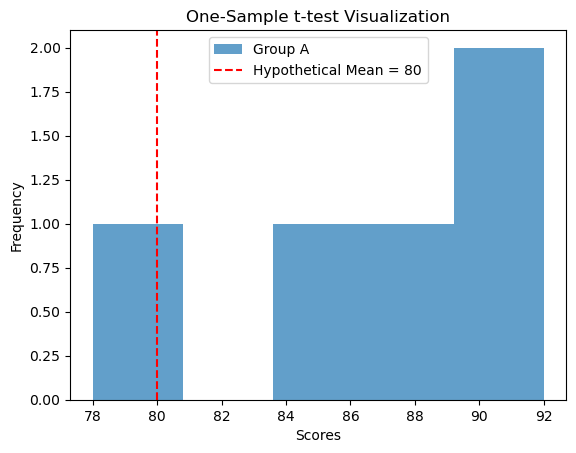

In [24]:
plt.hist(group_A, bins=5, alpha=0.7, label="Group A")
plt.axvline(x=80, color="red", linestyle="--", label="Hypothetical Mean = 80")
plt.title("One-Sample t-test Visualization")
plt.xlabel("Scores")
plt.ylabel("Frequency")
plt.legend()
plt.show()


In [25]:
# Plot 2: Boxplot for Two-Sample Test

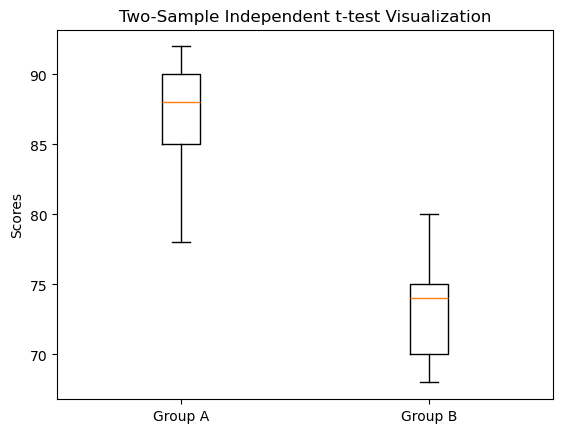

In [26]:
plt.boxplot([group_A, group_B], tick_labels=["Group A", "Group B"])
plt.title("Two-Sample Independent t-test Visualization")
plt.ylabel("Scores")
plt.show()


# T-Test Analysis on Churn Dataset: Checking Attribute Dependency

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

In [31]:
# Load churn dataset
df = pd.read_csv("Telco-Customer-Churn.csv")

# Quick look
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [ ]:
# Select Attribute (MonthlyCharges)

In [32]:
# Convert churn to numeric (Yes = 1, No = 0)
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})

# Groups
churned = df[df["Churn"] == 1]["MonthlyCharges"]
not_churned = df[df["Churn"] == 0]["MonthlyCharges"]


In [34]:
# Perform Two-Sample t-test
t_stat, p_val = stats.ttest_ind(churned, not_churned)

print("Two-Sample t-test for MonthlyCharges vs Churn:")
print("t-statistic =", t_stat)
print("p-value =", p_val)

Two-Sample t-test for MonthlyCharges vs Churn:
t-statistic = 16.536738015936308
p-value = 2.7066456068884154e-60


In [ ]:
# Visualization

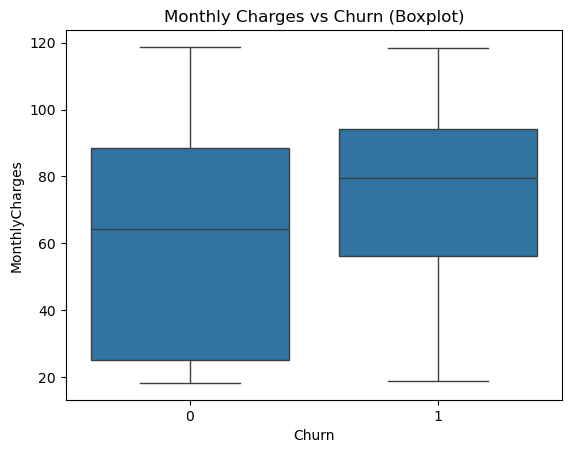

In [35]:
sns.boxplot(x="Churn", y="MonthlyCharges", data=df)
plt.title("Monthly Charges vs Churn (Boxplot)")
plt.show()


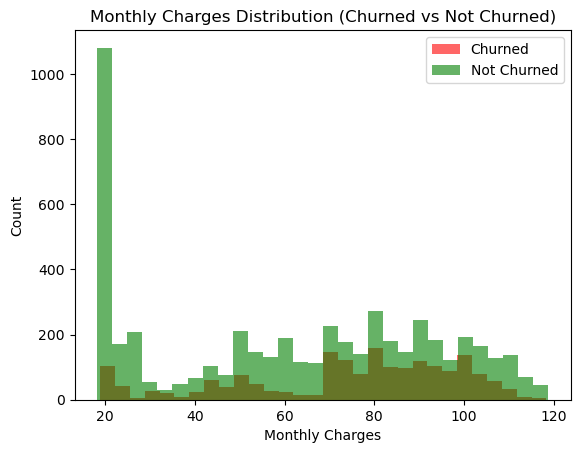

In [36]:
plt.hist(churned, bins=30, alpha=0.6, label="Churned", color="red")
plt.hist(not_churned, bins=30, alpha=0.6, label="Not Churned", color="green")
plt.title("Monthly Charges Distribution (Churned vs Not Churned)")
plt.xlabel("Monthly Charges")
plt.ylabel("Count")
plt.legend()
plt.show()
